### Importar librerías y leer el DataFrame

In [1]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")

# operating system
import os

# time calculation to track some processes
import time

# numeric and matrix operations
import numpy as np
import pandas as pd

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# python core library for machine learning and data science
import sklearn as sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#RANDOM_STATE = 175
#WD = os.getcwd()
#PATH_DATA_FOLDER = "/content/drive/MyDrive/TFM"

In [4]:
#PATH_DF = os.path.join(PATH_DATA_FOLDER,'/content/drive/MyDrive/TFM/Predict.csv')

#df = pd.read_csv(PATH_DF)

In [2]:
df=pd.read_csv(r'/Users/rulo/Desktop/Power_bi_X.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8354260 entries, 0 to 8354259
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   id                       object 
 1   yearweek                 int64  
 2   sales                    int64  
 3   item                     object 
 4   category                 object 
 5   store                    object 
 6   region                   object 
 7   sell_price               float64
 8   date_week                object 
 9   event                    object 
 10  revenue                  float64
 11  estado_id                object 
 12  product_rotation_weekly  float64
 13  rotation_category        object 
 14  sales_pct_change         float64
 15  cat_gama                 object 
dtypes: float64(4), int64(2), object(10)
memory usage: 1019.8+ MB


In [4]:
df.head()

,id,yearweek,sales,item,category,store,region,sell_price,date_week,event,revenue,estado_id,product_rotation_weekly,rotation_category,sales_pct_change,cat_gama
0,ACCESORIES_1_001_BOS_1,201117,0,ACCESORIES_1_001,ACCESORIES,South_End,Boston,12.7414,2011-01-05,no_event,0.0,prox_venta,0.0,prox_venta,0.0,Alta
1,ACCESORIES_1_001_BOS_1,201104,0,ACCESORIES_1_001,ACCESORIES,South_End,Boston,12.7414,2011-01-30,no_event,0.0,prox_venta,0.0,prox_venta,0.0,Alta
2,ACCESORIES_1_001_BOS_1,201139,0,ACCESORIES_1_001,ACCESORIES,South_End,Boston,12.7414,2011-02-10,no_event,0.0,prox_venta,0.0,prox_venta,0.0,Alta
3,ACCESORIES_1_001_BOS_1,201106,0,ACCESORIES_1_001,ACCESORIES,South_End,Boston,12.7414,2011-02-13,Valentine's Day,0.0,prox_venta,0.0,prox_venta,0.0,Alta
4,ACCESORIES_1_001_BOS_1,201107,0,ACCESORIES_1_001,ACCESORIES,South_End,Boston,12.7414,2011-02-20,Presidents Day,0.0,prox_venta,0.0,prox_venta,0.0,Alta


### Creación de variables a partir de Groupby

In [5]:
#Saber las ventas totales de cada item

df["total_sales"] =df.groupby(["item"])["sales"].transform(sum)

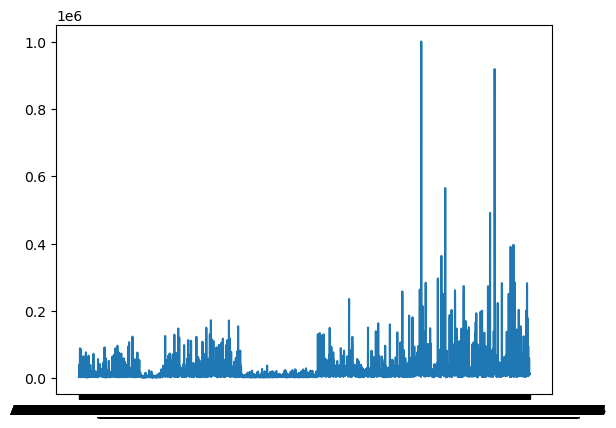

In [8]:
plt.plot("item", "total_sales", data=df)


In [9]:
# Saber los ingresos totales de cada item

df["total_revenue"] =df.groupby(["item"])["revenue"].transform(sum)

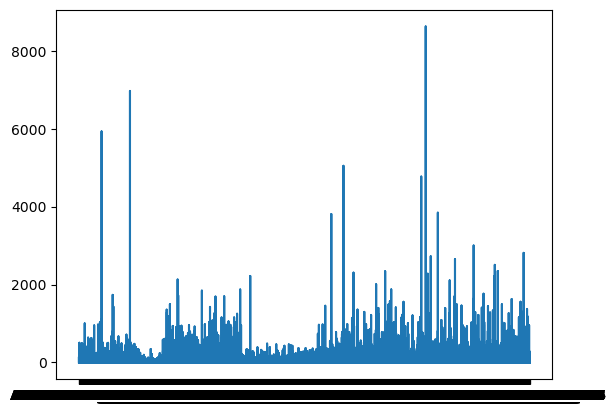

In [10]:
plt.plot("item", "revenue", data=df)

In [11]:
#Saber los precios de venta de cada item

df["total_price"] = df.groupby(["item"])["sell_price"].transform(sum)

In [12]:
#Saber la tendencia de ventas de cada item

df["pct_ventas"] = df.groupby(["item"])["sales_pct_change"].transform(sum)

In [13]:
#Creamos una funcion agregadora para obtener las medias de cada groupby y general las variables

aggregated_item = df.groupby(["item"]).agg(

    avg_sales = ('total_sales', 'mean'),
    avg_revenue= ('total_revenue', 'mean'),
    avg_price= ('total_price', 'mean'),
    avg_pct_ventas= ('pct_ventas', 'mean'),    

)

aggregated_item

,avg_sales,avg_revenue,avg_price,avg_pct_ventas
item,,,,
ACCESORIES_1_001,4093.0,45020.6596,31420.1594,199.004063
ACCESORIES_1_002,5059.0,26705.4557,14458.2837,47.928497
ACCESORIES_1_003,1435.0,5652.2340,10816.5043,-48.712622
ACCESORIES_1_004,39175.0,235405.2253,16383.6449,369.265219
ACCESORIES_1_005,14621.0,55658.1991,10514.7805,502.050843
...,...,...,...,...
SUPERMARKET_3_823,15388.0,50881.8600,9164.4720,89.601301
SUPERMARKET_3_824,8325.0,25411.2960,8292.2880,258.552408
SUPERMARKET_3_825,13526.0,65796.6360,13514.5320,419.746746


In [14]:
aggregated_item.shape

(3049, 4)

In [15]:
df_final = aggregated_item

In [16]:
df_final.head()

,avg_sales,avg_revenue,avg_price,avg_pct_ventas
item,,,,
ACCESORIES_1_001,4093.0,45020.6596,31420.1594,199.004063
ACCESORIES_1_002,5059.0,26705.4557,14458.2837,47.928497
ACCESORIES_1_003,1435.0,5652.2340,10816.5043,-48.712622
ACCESORIES_1_004,39175.0,235405.2253,16383.6449,369.265219
ACCESORIES_1_005,14621.0,55658.1991,10514.7805,502.050843


In [17]:
#Comprobamos si hay valores nulos

df_final.isnull().sum()


avg_sales         0
avg_revenue       0
avg_price         0
avg_pct_ventas    0
dtype: int64

In [18]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3049 entries, ACCESORIES_1_001 to SUPERMARKET_3_827
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   avg_sales       3049 non-null   float64
 1   avg_revenue     3049 non-null   float64
 2   avg_price       3049 non-null   float64
 3   avg_pct_ventas  3049 non-null   float64
dtypes: float64(4)
memory usage: 119.1+ KB


### Empezamos a preparar el modelo para encontrar los clusters

In [19]:
#Creamos una pipe para imputar posibles valores nulos y escalar los datos

pipe = Pipeline(steps = [
    ("Imputer", KNNImputer()),
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))),

])

In [20]:
#Hacemos un fit_transform para que se aplique a los datos

df_scaled_transformed = pipe.fit_transform(df_final)

In [21]:
#Entrenamos el modelo KMeans para ver cuantos clusters son los óptimos

sse = {}

for k in range(2, 15):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k)
    clustering_model.fit(df_scaled_transformed)

    sse[k] = clustering_model.inertia_

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters


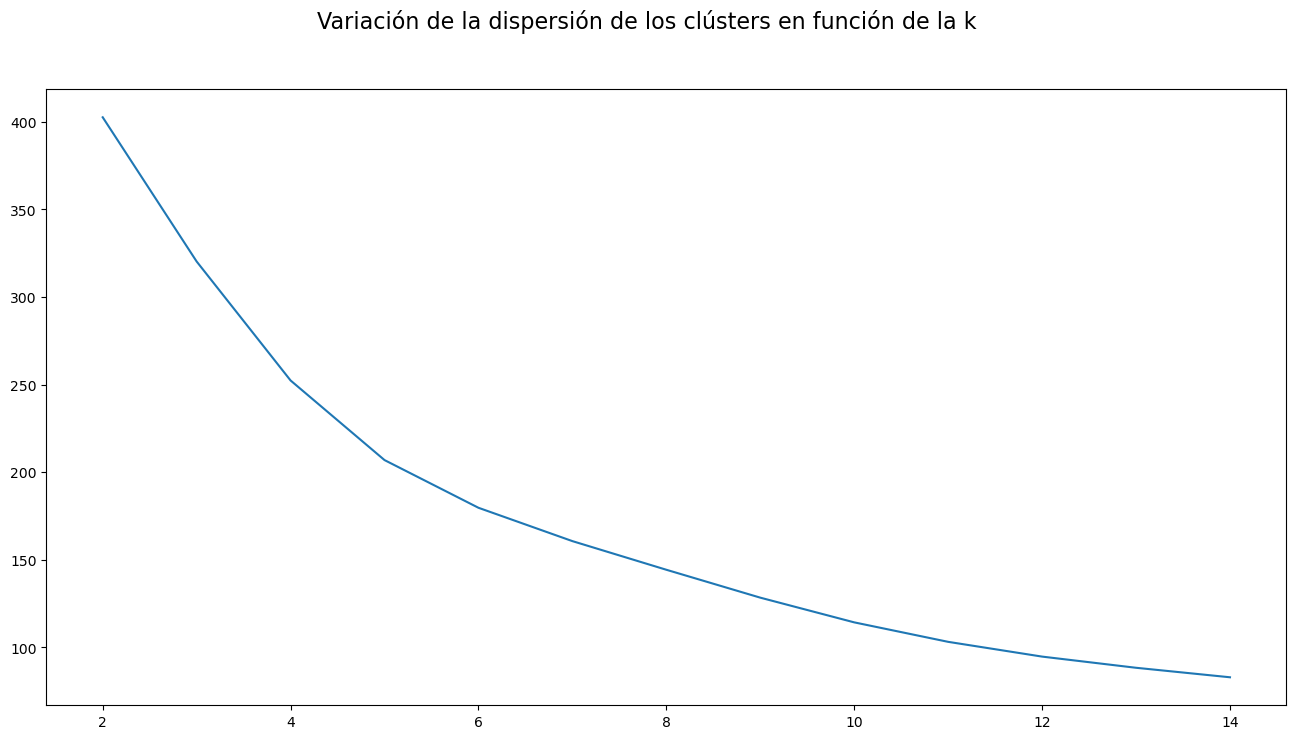

In [22]:
#Graficamos la dispersión de los clústers

fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

In [23]:
#Creamos una pipe con el número de clusters óptimos

pipe = Pipeline(steps = [
    ("Imputer", KNNImputer()),
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))),
    ("Clustering", KMeans(n_clusters = 4, random_state = 175))
])

In [24]:
df_final.shape

(3049, 4)

In [26]:
#Hacemos un fit para que se aplique a los datos

pipe.fit(df_final)

Pipeline(steps=[('Imputer', KNNImputer()),
                ('RobustScaler', RobustScaler(quantile_range=(0, 99.0))),
                ('Clustering', KMeans(n_clusters=4, random_state=175))])

In [27]:

X_processed = pipe[:1].transform(df_final)

In [28]:
#Generamos las labels a partir del predict hecho por el KMEANS

labels = pipe.predict(df_final)

In [29]:
X_processed["cluster"] = labels

In [30]:
X_processed.shape

(3049, 5)

In [31]:
X_processed.tail(3)

,avg_sales,avg_revenue,avg_price,avg_pct_ventas,cluster
item,,,,,
SUPERMARKET_3_825,13526.0,65796.636,13514.532,419.746746,1
SUPERMARKET_3_826,12188.0,18719.760,4208.304,400.712916,1
SUPERMARKET_3_827,11377.0,13640.400,3287.400,228.649682,1


In [32]:
X_processed.head()

,avg_sales,avg_revenue,avg_price,avg_pct_ventas,cluster
item,,,,,
ACCESORIES_1_001,4093.0,45020.6596,31420.1594,199.004063,2
ACCESORIES_1_002,5059.0,26705.4557,14458.2837,47.928497,1
ACCESORIES_1_003,1435.0,5652.2340,10816.5043,-48.712622,1
ACCESORIES_1_004,39175.0,235405.2253,16383.6449,369.265219,1
ACCESORIES_1_005,14621.0,55658.1991,10514.7805,502.050843,1


In [33]:
X_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3049 entries, ACCESORIES_1_001 to SUPERMARKET_3_827
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   avg_sales       3049 non-null   float64
 1   avg_revenue     3049 non-null   float64
 2   avg_price       3049 non-null   float64
 3   avg_pct_ventas  3049 non-null   float64
 4   cluster         3049 non-null   int32  
dtypes: float64(4), int32(1)
memory usage: 131.0+ KB


In [32]:
#Guardamos los resultados en un CSV

X_processed.to_csv(r'C:\Users\Guiye\Desktop\TFM\clustering_results.csv', index=False)

### Generamos los graficos del resultado para interpretarlos

In [34]:

ficha_df = pd.DataFrame()

In [35]:
for i, col in enumerate(["avg_sales", "avg_revenue", "avg_price", "avg_pct_ventas"]):
    resumen_data = X_processed[["cluster", col]].groupby("cluster").describe().T[1:]
    ficha_df = pd.concat([ficha_df, resumen_data],axis=0)

In [36]:
ficha_df.head()

cluster                    0             1            2              3
avg_sales mean  95786.131206  13271.583480  7014.702703  510352.400000
          std   54896.403534  12002.627346  6400.985418  252457.165195
          min   21600.000000    568.000000   746.000000  283104.000000
          25%   57622.500000   4585.500000  2756.000000  369811.750000
          50%   79766.000000   9311.500000  4545.000000  396145.500000

In [37]:
# generamos nuestro multiindex
out_index = [
    "Monetarios",
    "Monetarios",
    "Monetarios",
    "Monetarios",
    "Monetarios",

]

inner_index = [
    "Ventas",
    "Ingresos",
    "Precio",
    "Pct_variacion",
    

    
]

estadisticos = ["Media", "Desviación", "Mínimo", "Perc. 25", "Perc. 50", "Perc. 75", "Máximo"]

new_multi_index = []

for oi, ii, in zip(out_index, inner_index):
    for es in estadisticos:
        new_multi_index.append((oi, ii, es))

In [40]:
def generate_multiindex(list_of_tuples, names):
    return pd.MultiIndex.from_tuples(list_of_tuples, names = names)

In [39]:
names = ["Grupo Indicadores", "Indicador", "Estadístico"]
index_ficha = generate_multiindex(new_multi_index, names)
ficha_df.set_index(index_ficha, inplace = True)

In [41]:
tamaño_clusters = X_processed.groupby("cluster").size().to_frame().T
tamaño_clusters.set_index(generate_multiindex([("General", "Clúster", "Tamaño")] , names), inplace = True)

In [42]:
ficha_df = pd.concat([tamaño_clusters, ficha_df])

In [43]:
ficha_df = ficha_df.rename(columns = {
    0 : "Gama Alta",
    1 : "Producto Genérico",
    2 : "Top Ventas",
    3 : "Productos en Alza",
})

In [44]:
ficha_df.style.background_gradient(cmap = 'Blues', axis = 1)

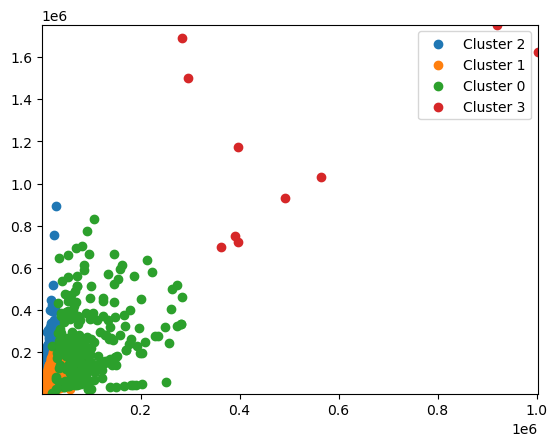

In [46]:
fig, ax = plt.subplots()

# Crear un gráfico de dispersión para cada cluster
for cluster in X_processed['cluster'].unique():
    cluster_data = X_processed[X_processed['cluster'] == cluster]
    ax.scatter(cluster_data['avg_sales'], cluster_data['avg_revenue'], label=f'Cluster {cluster}')

# Añadir una leyenda
ax.legend()

# Calcular los límites de los ejes
min_value_x = X_processed['avg_sales'].min()
max_value_x = X_processed['avg_sales'].max()
min_value_y = X_processed['avg_revenue'].min()
max_value_y = X_processed['avg_revenue'].max()

# Ajustar los límites de los ejes
ax.set_xlim([min_value_x, max_value_x])
ax.set_ylim([min_value_y, max_value_y])

# Mostrar el gráfico
plt.show()